<a href="https://colab.research.google.com/github/santanukumar666/data_analysis_projects/blob/main/EDA_of_INDIAN_EDUCATION_STATISTICS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import geopandas as gpd
style.use('fivethirtyeight')

Imported all the necessary libraries needed for EDA of these datasets

In [175]:
dropout=pd.read_csv("dropout-ratio-2012-2015.csv",parse_dates=['year'],index_col='year')
enroll=pd.read_csv("gross-enrollment-ratio-2013-2016.csv")
computers=pd.read_csv("percentage-of-schools-with-comps-2013-2016.csv")
electricity=pd.read_csv("percentage-of-schools-with-electricity-2013-2016.csv")
water=pd.read_csv("percentage-of-schools-with-water-facility-2013-2016.csv")
boys_toilet=pd.read_csv("schools-with-boys-toilet-2013-2016.csv")
girls_toilet=pd.read_csv("schools-with-girls-toilet-2013-2016.csv")

Assigning the datasets

In [176]:
dropout.head()

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
year,,,,,,,,,,,,,
2012-13,A & N Islands,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
2013-14,A & N Islands,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2014-15,A & N Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
2012-13,Andhra Pradesh,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
2013-14,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [177]:
import re
col= ['Primary_Boys','Primary_Girls','Primary_Girls','Upper Primary_Boys','Upper Primary_Girls','Upper Primary_Total','Secondary _Boys','Secondary _Girls','Secondary _Total','HrSecondary_Boys','HrSecondary_Girls','HrSecondary_Total']
dropout[col]= dropout[col].replace('NR',np.nan)
dropout[col]= dropout[col].replace('Uppe_r_Primary',np.nan).astype(float)
dropout.head()

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
year,,,,,,,,,,,,,
2012-13,A & N Islands,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
2013-14,A & N Islands,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87
2014-15,A & N Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
2012-13,Andhra Pradesh,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
2013-14,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


Replaced "NR" value and "Uppe_r_Primary" to NaN

In [178]:
dropout['State_UT'] = dropout.State_UT.str.replace(' +', ' ')
dropout['State_UT'] = dropout.State_UT.str.replace('A & N Islands', 'Andaman and Nicobar Islands')
dropout['State_UT'] = dropout.State_UT.str.replace('&', 'and')

print('Number of Indian States: ', dropout.State_UT.nunique())
print('List of Indian States:\n', dropout.State_UT.unique())

Number of Indian States:  37
List of Indian States:
 ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'All India']


Replaced multiple spaces with 1 space for Indian States,
Updated shortened version of a state to its full name,
Updated ampersand to the word 'and',
Printed the unique state names.


In [179]:
dropout.isna().sum()

State_UT                0
Primary_Boys           15
Primary_Girls          15
Primary_Total           0
Upper Primary_Boys     17
Upper Primary_Girls     8
Upper Primary_Total     9
Secondary _Boys         4
Secondary _Girls        4
Secondary _Total        4
HrSecondary_Boys       28
HrSecondary_Girls      34
HrSecondary_Total      31
dtype: int64

Total number of NaN values

In [180]:
dropout.dtypes

State_UT                object
Primary_Boys           float64
Primary_Girls          float64
Primary_Total           object
Upper Primary_Boys     float64
Upper Primary_Girls    float64
Upper Primary_Total    float64
Secondary _Boys        float64
Secondary _Girls       float64
Secondary _Total       float64
HrSecondary_Boys       float64
HrSecondary_Girls      float64
HrSecondary_Total      float64
dtype: object

In [181]:
dropout['Primary_Total'] = pd.to_numeric(dropout['Primary_Total'], errors='coerce')

Removed all the missing and garbage values and replaced it with NAN Changed all the data to float

In [182]:
dropout.describe(include='all')

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110,95.000000,95.000000,93.000000,93.000000,102.000000,101.000000,106.000000,106.000000,106.000000,82.000000,76.000000,79.000000
unique,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dadra and Nagar Haveli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.971368,4.644105,4.908602,4.236667,4.496471,4.181089,17.809906,16.926981,17.393868,9.347317,7.206974,8.296329
std,NaN,4.683392,4.590296,4.617200,3.286495,3.364940,3.285638,8.435483,9.015808,8.609419,7.160002,5.213958,6.135895
min,NaN,0.000000,0.260000,0.200000,0.010000,0.000000,0.070000,5.570000,4.210000,5.320000,0.230000,0.300000,0.350000
25%,NaN,1.350000,1.120000,1.290000,2.370000,2.242500,1.790000,11.740000,9.832500,10.587500,3.097500,3.685000,3.375000
50%,NaN,3.630000,3.250000,3.580000,3.490000,3.855000,3.800000,16.340000,15.290000,15.445000,8.290000,5.850000,7.640000
75%,NaN,7.000000,6.635000,6.790000,5.630000,6.122500,5.550000,23.342500,22.540000,23.345000,13.422500,9.715000,11.520000


Description of the Dropout dataset

In [183]:
states={}
for state_name in dropout['State_UT'].unique():
    State_UT = dropout.query(f'State_UT== "{state_name}"').copy()
    col= State_UT.isna().sum()[State_UT.isna().sum()>0].index
    State_UT[col]= State_UT[col].fillna(State_UT[col].mean())
    states[str(state_name)]= State_UT

print(states.keys())

dict_keys(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'All India'])


In [184]:
means={}
for state_name in states.keys():
    State_UT = states[state_name]
    State_UT['mean']= State_UT.mean(axis=1)
    means[str(state_name)]= State_UT['mean'].sum()

Calculating the mean of dropout rates in each individual state in all three sessions.(12-13,13-14,14-15)

In [185]:
for State_UT in states.keys():
    display(states[State_UT])

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Andaman and Nicobar Islands,0.83,0.51,0.68,1.44,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.367500
2013-14,Andaman and Nicobar Islands,1.35,1.06,1.21,1.44,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87,6.305000
2014-15,Andaman and Nicobar Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.191667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Andhra Pradesh,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.660,10.85,0.35,5.970833
2013-14,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.650,10.85,11.79,8.139167
2014-15,Andhra Pradesh,6.57,6.89,6.72,5.09,5.32,5.20,15.81,15.60,15.71,7.655,10.85,6.07,8.957083


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2013-14,Arunachal Pradesh,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07,11.989167
2012-13,Arunachal Pradesh,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11,10.135000
2014-15,Arunachal Pradesh,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42,13.250000


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Assam,7.02,5.46,6.24,7.89,6.55,7.20,25.65,27.79,26.77,4.870,4.500,4.690,11.219167
2013-14,Assam,8.19,6.68,7.44,7.60,6.54,7.05,28.59,32.10,30.43,7.620,6.830,7.240,13.025833
2014-15,Assam,16.07,14.65,15.36,10.45,10.56,10.51,24.64,29.28,27.06,6.245,5.665,5.965,14.704583


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Bihar,1.365,1.79,2.09,3.455,3.60,3.53,29.11,31.28,30.14,NaN,NaN,NaN,11.817778
2013-14,Bihar,2.380,1.79,2.09,2.770,3.19,2.98,24.67,26.05,25.33,NaN,NaN,NaN,10.138889
2014-15,Bihar,0.350,1.79,2.09,4.140,4.01,4.08,25.21,26.62,25.90,NaN,NaN,NaN,10.465556


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Chandigarh,NaN,NaN,NaN,0.365,0.88,0.10,NaN,NaN,NaN,16.32,10.09,13.65,6.900833
2013-14,Chandigarh,NaN,NaN,NaN,0.720,1.55,1.08,NaN,NaN,NaN,13.24,8.49,11.28,6.060000
2014-15,Chandigarh,NaN,NaN,NaN,0.010,0.96,0.44,NaN,NaN,NaN,12.10,8.41,10.55,5.411667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Chhattisgarh,4.24,4.05,4.14,6.09,4.73,5.42,14.82,14.89,14.86,1.37,3.135,2.76,6.708750
2013-14,Chhattisgarh,1.45,1.38,1.42,4.09,3.51,3.80,24.10,22.72,23.41,1.37,2.130,2.76,7.678333
2014-15,Chhattisgarh,3.08,2.74,2.91,6.47,5.22,5.85,22.62,19.92,21.26,1.37,4.140,2.76,8.195000


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Dadra and Nagar Haveli,1.325,0.47,1.52,2.59,4.30,3.38,26.34,22.00,24.41,13.34,4.81,9.65,9.511250
2013-14,Dadra and Nagar Haveli,1.050,2.17,1.57,3.31,5.09,4.13,30.02,26.83,28.59,7.07,5.33,6.24,10.116667
2014-15,Dadra and Nagar Haveli,1.600,1.31,1.47,3.70,4.40,4.02,18.19,15.08,16.77,13.45,4.77,9.47,7.852500


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Daman and Diu,1.43,0.44,0.98,3.28,3.395,3.335,10.84,12.25,11.52,6.21,20.47,1.26,6.284167
2013-14,Daman and Diu,1.06,0.59,0.85,3.42,3.720,3.560,19.46,20.33,19.86,14.48,4.89,9.86,8.506667
2014-15,Daman and Diu,1.80,0.29,1.11,3.14,3.070,3.110,34.45,29.73,32.27,44.38,36.05,40.48,19.156667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Delhi,NaN,NaN,NaN,2.04,0.31,1.77,6.26,4.21,5.32,18.56,9.60,14.47,6.948889
2013-14,Delhi,NaN,NaN,NaN,3.13,2.37,2.78,10.80,6.64,8.90,20.28,11.45,16.25,9.177778
2014-15,Delhi,NaN,NaN,NaN,0.95,0.55,0.76,13.55,9.80,11.81,20.91,13.15,17.32,9.866667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Goa,0.355,0.26,0.465,NaN,0.21,0.07,9.49,6.26,7.96,16.01,5.80,11.26,5.285455
2013-14,Goa,0.080,0.33,0.200,NaN,0.21,0.07,11.68,7.19,9.58,18.21,8.38,13.36,6.299091
2014-15,Goa,0.630,0.84,0.730,NaN,0.21,0.07,14.15,7.68,11.15,18.27,9.39,13.91,7.002727


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Gujarat,0.21,1.35,0.74,2.75,8.19,5.20,13.96,12.95,13.55,0.58,0.30,0.46,5.020000
2013-14,Gujarat,0.50,1.06,0.76,3.52,8.04,5.55,22.85,19.81,21.61,9.06,6.18,7.83,8.897500
2014-15,Gujarat,0.82,0.98,0.89,4.65,8.54,6.41,26.29,23.24,25.04,8.40,5.26,7.04,9.796667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Haryana,1.48,1.06,1.29,0.18,0.80,0.46,8.22,9.93,8.98,3.825,4.14,3.965,3.694167
2013-14,Haryana,0.22,0.63,0.41,1.97,3.25,2.55,11.92,13.27,12.51,1.410,3.16,2.180,4.456667
2014-15,Haryana,5.54,5.69,5.61,5.50,6.18,5.81,16.35,15.30,15.89,6.240,5.12,5.750,8.248333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Himachal Pradesh,0.51,0.39,0.45,0.52,0.49,0.51,8.35,8.40,8.37,10.25,7.64,9.02,4.575000
2013-14,Himachal Pradesh,0.57,0.34,0.46,0.60,0.98,0.78,9.32,8.83,9.09,8.44,5.54,7.07,4.335000
2014-15,Himachal Pradesh,0.46,0.83,0.64,0.50,1.27,0.87,6.31,5.80,6.07,9.02,5.57,7.41,3.729167


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Jammu and Kashmir,6.80,5.75,6.30,5.51,5.52,5.52,16.79,17.96,17.33,11.69,9.36,10.66,9.9325
2013-14,Jammu and Kashmir,5.53,5.37,5.46,3.86,4.80,4.30,14.70,16.14,15.36,8.80,6.20,7.64,8.1800
2014-15,Jammu and Kashmir,6.98,6.59,6.79,4.98,5.95,5.44,16.97,17.65,17.28,13.85,11.20,12.65,10.5275


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Jharkhand,7.36,7.05,7.21,4.99,5.94,5.47,17.84,19.20,18.50,2.72,4.18,3.41,8.655833
2013-14,Jharkhand,6.89,5.91,6.41,7.19,7.65,7.42,22.99,23.32,23.15,2.72,4.18,3.41,10.103333
2014-15,Jharkhand,5.91,5.03,5.48,9.01,8.96,8.99,23.45,24.56,24.00,2.72,4.18,3.41,10.475000


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Karnataka,3.40,2.51,2.97,4.96,5.15,5.05,40.70,39.07,39.92,19.47,11.26,15.330,15.815833
2013-14,Karnataka,2.42,2.21,2.32,2.31,2.73,2.51,28.49,26.57,27.57,12.72,11.26,8.645,10.812917
2014-15,Karnataka,2.03,2.01,2.02,3.46,4.27,3.85,27.71,24.52,26.18,5.97,11.26,1.960,9.603333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Kerala,NaN,NaN,NaN,NaN,0.0,NaN,12.31,6.38,9.45,4.245,5.9,3.435,5.960000
2013-14,Kerala,NaN,NaN,NaN,NaN,0.0,NaN,17.30,11.40,14.46,6.950,5.9,6.400,8.915714
2014-15,Kerala,NaN,NaN,NaN,NaN,0.0,NaN,14.96,9.52,12.32,1.540,5.9,0.470,6.387143


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Lakshadweep,2.30,2.71,2.5,0.97,2.84,0.29,6.15,9.17,7.68,2.98,10.65,6.59,4.569167
2013-14,Lakshadweep,0.00,2.71,2.5,1.16,2.50,1.86,8.48,7.65,8.03,3.03,2.59,2.82,3.610833
2014-15,Lakshadweep,1.15,2.71,2.5,2.37,3.18,2.78,8.82,4.96,6.76,3.00,3.21,3.12,3.713333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Madhya Pradesh,5.75,6.49,6.11,6.79,10.27,8.53,11.16,16.39,13.63,0.52,1.78,1.55,7.414167
2013-14,Madhya Pradesh,9.91,10.40,10.14,9.88,13.57,11.70,25.21,27.91,26.47,0.52,2.83,1.55,12.507500
2014-15,Madhya Pradesh,6.48,6.72,6.59,7.78,10.70,9.20,23.71,25.97,24.77,0.52,0.73,1.55,10.393333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Maharashtra,0.88,1.06,0.97,0.89,2.72,1.74,16.61,15.72,16.20,2.55,3.94,3.20,5.540000
2013-14,Maharashtra,0.51,0.59,0.55,0.89,1.50,0.61,15.04,13.78,14.47,2.85,3.89,3.34,4.835000
2014-15,Maharashtra,1.26,1.25,1.26,0.89,2.83,1.79,13.11,12.58,12.87,2.02,1.60,1.83,4.440833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Manipur,10.24,9.48,9.86,5.48,6.65,6.06,8.16,11.35,9.75,5.96,10.06,7.930,8.415000
2013-14,Manipur,17.27,18.74,18.00,7.48,6.54,7.02,12.35,15.28,13.81,3.30,3.08,3.200,10.505833
2014-15,Manipur,9.50,9.83,9.66,3.61,4.80,4.20,12.94,15.86,14.38,4.63,6.57,5.565,8.462083


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Meghalaya,11.32,8.96,10.14,8.43,7.34,7.85,27.21,25.02,26.03,NaN,NaN,NaN,14.700000
2013-14,Meghalaya,11.30,9.39,10.34,6.34,7.28,6.84,25.63,23.99,24.75,NaN,NaN,NaN,13.984444
2014-15,Meghalaya,10.35,8.56,9.46,6.77,6.30,6.52,20.80,20.27,20.52,NaN,NaN,NaN,12.172222


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Mizoram,24.27,23.93,24.11,19.35,19.21,19.28,22.18,20.65,21.42,2.910,4.85,6.91,17.422500
2013-14,Mizoram,12.57,13.38,12.96,6.61,5.39,6.02,20.00,17.37,18.70,5.955,4.85,6.91,10.892917
2014-15,Mizoram,10.17,10.03,10.10,5.46,4.06,4.78,23.02,20.73,21.88,9.000,4.85,6.91,10.915833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Nagaland,7.11,7.03,7.07,10.15,9.51,9.83,26.70,26.33,26.51,18.67,17.87,18.29,15.4225
2013-14,Nagaland,19.09,19.74,19.41,18.08,17.63,17.86,34.14,36.08,35.11,15.36,12.96,14.19,21.6375
2014-15,Nagaland,6.18,5.02,5.61,7.87,7.97,7.92,17.98,18.47,18.23,10.36,3.19,6.97,9.6475


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Odisha,3.63,3.49,3.56,4.10,3.52,3.81,50.09,49.62,49.86,NaN,NaN,NaN,19.075556
2013-14,Odisha,2.83,3.05,2.94,3.11,2.48,2.80,49.39,49.57,49.48,NaN,NaN,NaN,18.405556
2014-15,Odisha,2.91,2.81,2.86,4.11,3.49,3.81,29.74,29.37,29.56,NaN,NaN,NaN,12.073333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Puducherry,0.25,0.43,0.34,0.33,1.05,0.68,18.49,11.72,15.21,6.79,3.87,5.25,5.367500
2013-14,Puducherry,0.76,0.57,0.66,0.37,0.83,0.60,18.22,10.02,14.24,13.24,9.28,11.16,6.662500
2014-15,Puducherry,0.36,0.38,0.37,0.44,0.69,0.56,14.94,9.36,12.19,5.40,3.69,4.50,4.406667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Punjab,1.99,1.98,1.99,2.58,3.04,2.78,9.40,10.30,9.80,9.69,6.53,8.28,5.696667
2013-14,Punjab,1.35,1.21,1.29,2.52,3.27,2.85,8.93,8.71,8.83,7.87,3.20,5.81,4.653333
2014-15,Punjab,2.89,3.25,3.05,2.95,3.55,3.22,9.22,8.39,8.86,7.52,3.67,5.83,5.200000


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Rajasthan,7.20,8.85,7.97,2.86,6.34,4.42,13.06,14.49,13.65,NaN,NaN,NaN,8.760000
2013-14,Rajasthan,7.76,9.12,8.39,4.49,7.95,6.03,17.85,20.06,18.77,NaN,NaN,NaN,11.157778
2014-15,Rajasthan,5.02,5.02,5.02,2.54,3.73,3.07,13.54,13.40,13.48,NaN,NaN,NaN,7.202222


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Sikkim,4.78,2.31,3.60,2.60,3.64,3.15,9.93,8.64,9.23,11.79,4.92,8.10,6.057500
2013-14,Sikkim,5.55,3.49,4.57,6.35,3.98,5.14,13.74,12.14,12.89,14.11,11.92,12.91,8.899167
2014-15,Sikkim,3.75,0.62,2.27,2.07,1.08,1.57,17.58,14.39,15.89,12.48,11.17,11.76,7.885833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Tamil Nadu,4.020,4.100,4.06,0.38,2.13,1.24,14.26,5.86,10.2,1.34,2.33,1.87,4.315833
2013-14,Tamil Nadu,0.530,0.390,0.46,4.38,4.67,4.52,16.13,7.99,12.2,4.55,4.35,4.44,5.384167
2014-15,Tamil Nadu,2.275,2.245,2.26,2.38,3.40,2.88,11.67,4.36,8.1,4.59,2.34,3.41,4.159167


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2013-14,Telangana,6.04,5.57,5.81,4.63,4.79,4.71,17.99,16.86,17.43,13.67,13.2,13.43,10.344167
2014-15,Telangana,2.21,1.94,2.08,2.43,2.17,2.30,16.54,14.50,15.53,2.06,13.2,0.77,6.310833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Tripura,2.31,2.11,2.22,3.10,3.07,3.08,24.09,26.99,25.50,8.40,9.49,8.87,9.935833
2013-14,Tripura,3.63,3.52,3.58,3.21,2.20,2.72,24.51,25.70,25.09,9.15,9.06,9.11,10.123333
2014-15,Tripura,1.37,1.19,1.28,2.37,1.61,1.99,28.03,28.83,28.42,8.97,8.89,8.93,10.156667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Uttar Pradesh,10.53,10.03,10.28,0.78,3.10,1.06,8.575,8.975,8.76,1.79,2.45,2.1,5.702500
2013-14,Uttar Pradesh,7.91,6.21,7.08,0.78,2.43,0.53,7.260,7.350,7.30,1.79,2.45,2.1,4.432500
2014-15,Uttar Pradesh,9.08,8.04,8.58,0.78,4.61,2.70,9.890,10.600,10.22,1.79,2.45,2.1,5.903333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Uttarakhand,1.14,1.18,1.16,1.285,1.00,0.13,8.97,10.45,9.68,1.35,1.85,1.59,3.315417
2013-14,Uttarakhand,3.28,2.83,3.07,1.780,1.57,1.68,9.85,7.44,8.70,0.23,2.23,2.30,3.746667
2014-15,Uttarakhand,4.37,3.67,4.04,0.790,1.62,1.19,11.26,9.46,10.40,3.40,2.61,3.01,4.651667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,West Bengal,6.88,5.71,6.30,6.29,4.16,5.18,14.95,19.41,17.30,7.81,8.49,8.13,9.217500
2013-14,West Bengal,3.44,2.37,2.91,5.63,3.10,4.31,16.73,19.77,18.34,8.03,7.76,7.90,8.357500
2014-15,West Bengal,2.13,0.79,1.47,5.84,2.88,4.30,16.33,19.06,17.80,8.18,8.04,8.11,7.910833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,All India,4.68,4.66,4.67,2.30,4.01,3.13,14.54,14.54,14.54,0.865,1.61,1.54,5.923750
2013-14,All India,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.480,1.61,1.54,6.880833
2014-15,All India,4.36,3.88,4.13,3.49,4.60,4.03,17.21,16.88,17.06,0.250,1.61,1.54,6.586667


In [186]:
mean_df= pd.DataFrame(means.values(),index=means.keys(),columns=['mean_sum'])
state= mean_df.sort_values(by='mean_sum',ascending=False).iloc[0].name
print(f'"{state}" State has the highest dropout ratio')
mean_df

"Odisha" State has the highest dropout ratio


,mean_sum
Andaman and Nicobar Islands,18.864167
Andhra Pradesh,23.067083
Arunachal Pradesh,35.374167
Assam,38.949583
Bihar,32.422222
Chandigarh,18.372500
Chhattisgarh,22.582083
Dadra and Nagar Haveli,27.480417
Daman and Diu,33.947500
Delhi,25.993333


Found the sum of mean of all the 3 sessions and also the state with highest ratio of dropouts

In [187]:
mean_2012_13={}
mean_2013_14={}
mean_2014_15={}

for state in states.keys():
    
    mean_2012_13[str(state)]= states[state].iloc[0]['mean']
    try:
        mean_2013_14[str(state)]= states[state].iloc[1]['mean']
    except IndexError as e:
        mean_2013_14[str(state)]= np.nan        
    try:
        mean_2014_15[str(state)]= states[state].iloc[2]['mean']
    except IndexError as e:
        mean_2014_15[str(state)]= np.nan

In [188]:
mean_df['mean_2012_13']= mean_2012_13.values()
mean_df['mean_2013_14']= mean_2013_14.values()
mean_df['mean_2014_15']= mean_2014_15.values()
mean_df

,mean_sum,mean_2012_13,mean_2013_14,mean_2014_15
Andaman and Nicobar Islands,18.864167,5.367500,6.305000,7.191667
Andhra Pradesh,23.067083,5.970833,8.139167,8.957083
Arunachal Pradesh,35.374167,11.989167,10.135000,13.250000
Assam,38.949583,11.219167,13.025833,14.704583
Bihar,32.422222,11.817778,10.138889,10.465556
Chandigarh,18.372500,6.900833,6.060000,5.411667
Chhattisgarh,22.582083,6.708750,7.678333,8.195000
Dadra and Nagar Haveli,27.480417,9.511250,10.116667,7.852500
Daman and Diu,33.947500,6.284167,8.506667,19.156667
Delhi,25.993333,6.948889,9.177778,9.866667


Combined the data frames to show the combined mean
We have the data for all the states for 3 sessions except Telengana

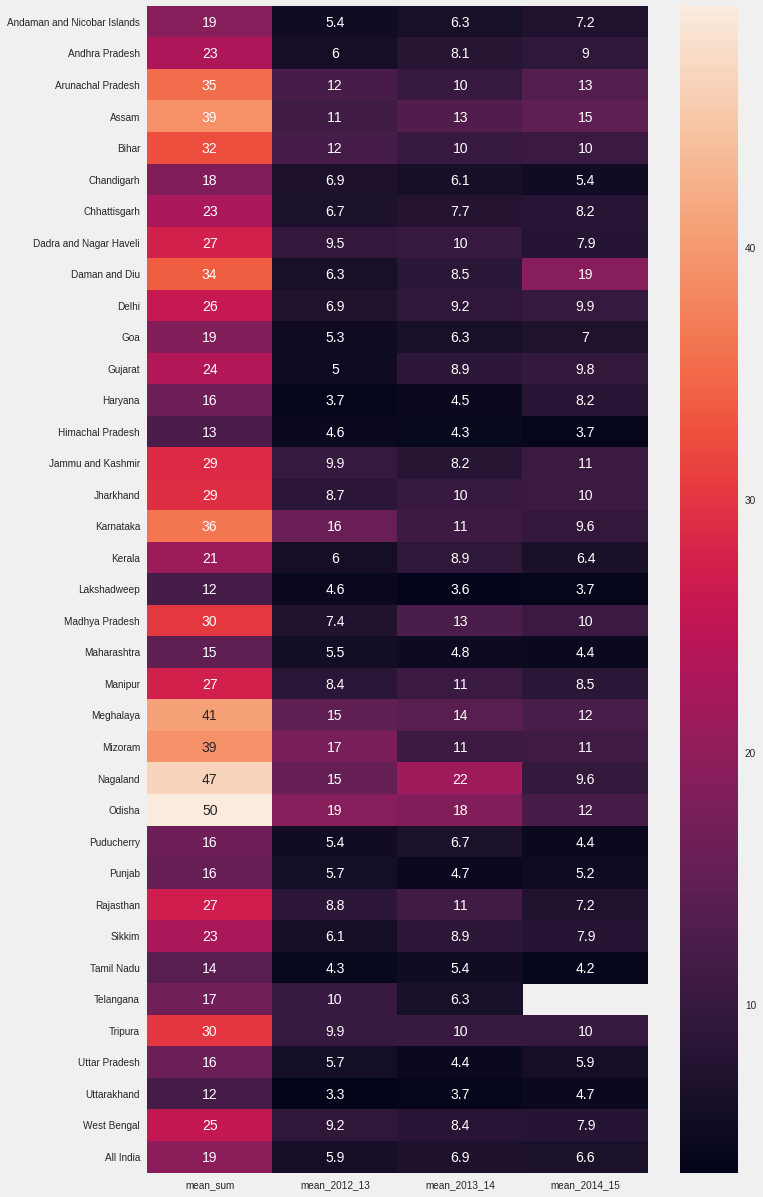

In [189]:
plt.figure(figsize=(10, 20))
sns.heatmap(mean_df, annot = True)

Represented it with a heat map for the above dataframe.
It shows the same result.

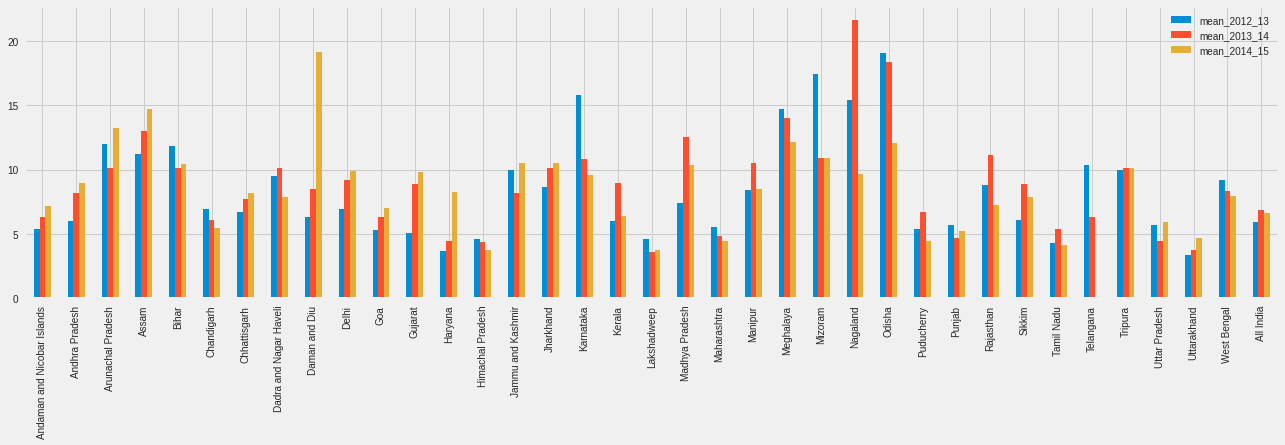

In [190]:
mean_df[['mean_2012_13', 'mean_2013_14', 'mean_2014_15']].plot(kind='bar',figsize=(20,5))

And also with a bar-plot

## In the year of 2012-13 Daman and Diu had the highest dropout ratio, In the year 2013-14 Nagaland had the highest ratio and in the year 2014-15 it was Odisha.

# After detailed analysis of dropout dataset we can conclude that the state of 'ODISHA' has the highest rate of dropout ratio.

## Although the ratio has decreased over the 3 sessions          (12-13,13-14,14-15),It still remains at the top.




In [191]:
enroll.head()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7


Dataset of Gross enrollment ratio

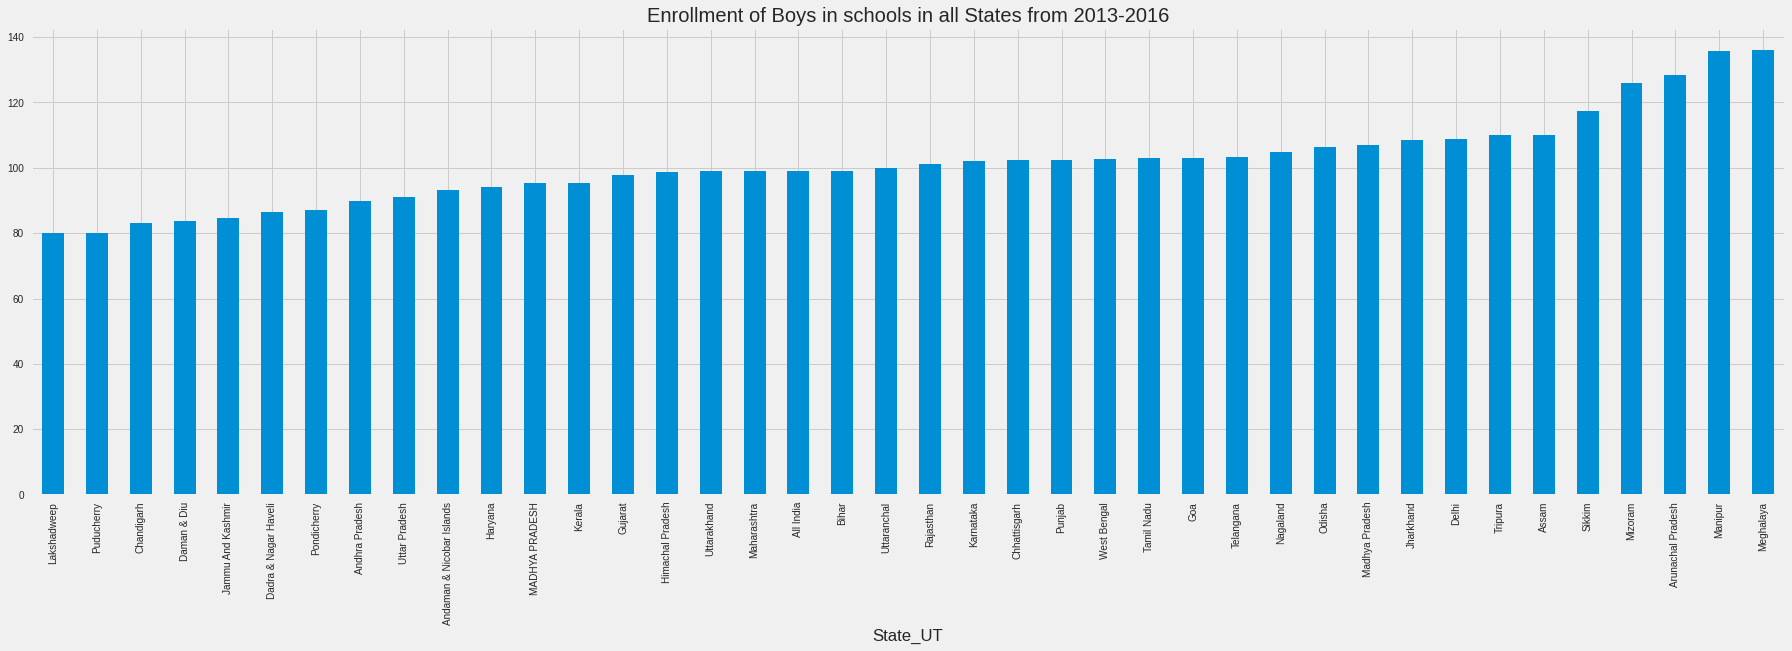

In [192]:
enroll.groupby(['State_UT'])['Primary_Boys'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Enrollment of Boys in schools in all States from 2013-2016')


This bar-plot shows the distribution of enrollment ratio of boys in  schools across India.We can see that 'J&K' has the least ratio among states while 'Meghalaya' has the highest ratio among states.'Lakshadweep' has the highest ratio among UTs

In [193]:
chart = px.pie(data_frame=enroll,values = 'Primary_Boys',names='State_UT',height = 500)
chart.update_traces(textposition = 'inside',textinfo = 'percent+label')

chart.update_layout(title_x = 0.5,
                   geo = dict(showframe = False,
                             showcoastlines = False))
chart.show()

This pie-chart also shows the same result

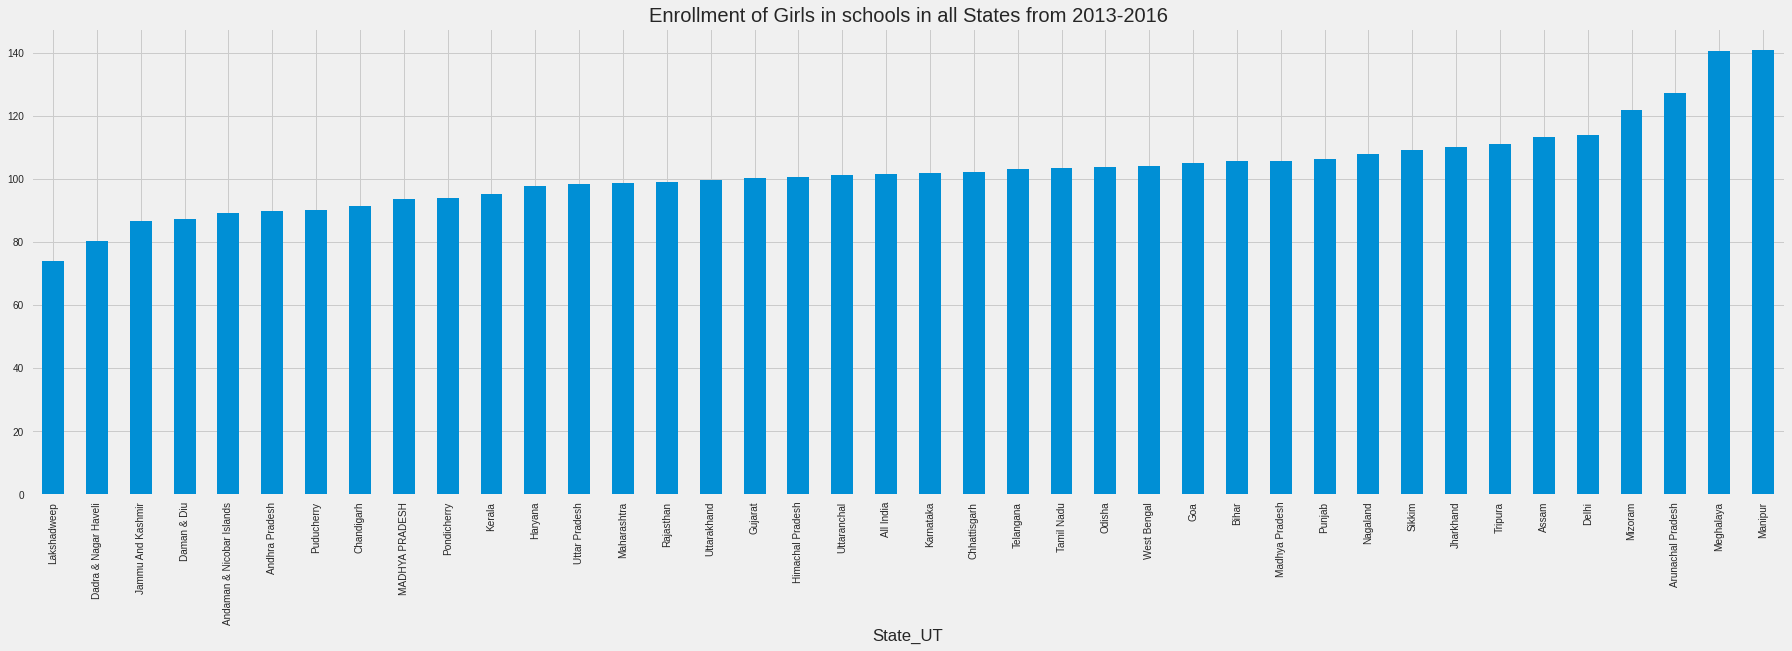

In [194]:
enroll.groupby(['State_UT'])['Primary_Girls'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Enrollment of Girls in schools in all States from 2013-2016')

This bar-plot shows the distribution of enrollment ratio of girls in schools across India.We can see that 'J&K' has the least ratio among states while 'Manipur' has the highest ratio among states.'Lakshadweep' has the highest ratio among UTs

In [195]:
chart = px.pie(data_frame=enroll,values = 'Primary_Girls',names='State_UT',height = 500)
chart.update_traces(textposition = 'inside',textinfo = 'percent+label')

chart.update_layout(title_x = 0.5,
                   geo = dict(showframe = False,
                             showcoastlines = False))
chart.show()

This pie-chart also shows the same result

In [196]:
electricity.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,82.42,96.05,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,88.86
1,Andaman & Nicobar Islands,2014-15,80.72,96.30,100.00,100.0,100.00,100.00,0.00,0.00,100.00,0.00,88.89
2,Andaman & Nicobar Islands,2015-16,82.11,97.62,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,90.10
3,Andhra Pradesh,2013-14,87.66,93.57,99.32,100.0,67.48,96.19,96.15,97.50,100.00,91.27,90.34
4,Andhra Pradesh,2014-15,91.08,94.70,100.00,100.0,86.11,97.60,97.11,93.55,83.33,93.21,92.76


Dataset of percentage of schools with electricity 

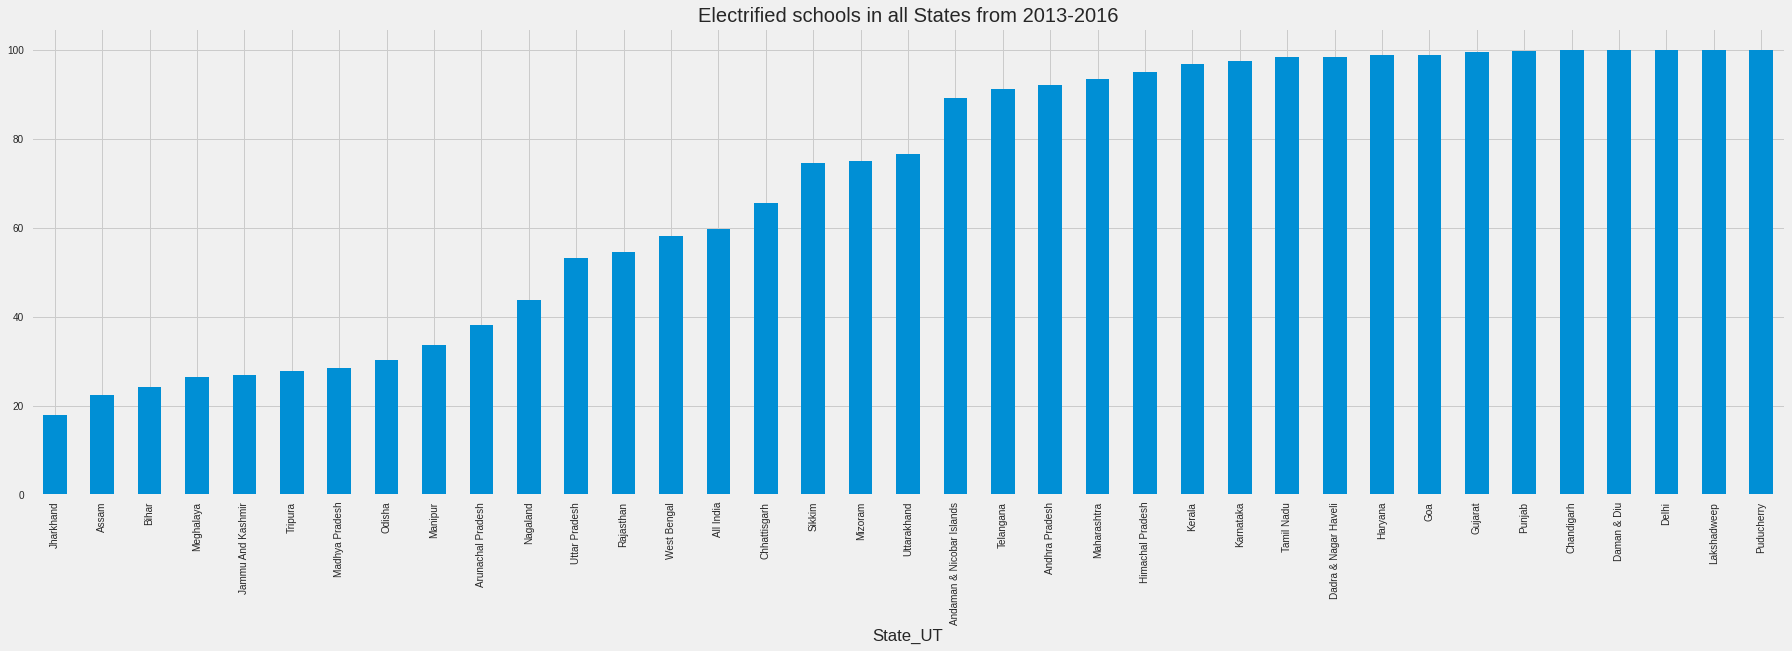

In [197]:
electricity.groupby(['State_UT'])['All Schools'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Electrified schools in all States from 2013-2016')

This bar-plot shows the distribution of electrified schools across India.We can see that 'Jharkhand' has the least electrified schools while 'Puducherry' has the most electrified schools

In [198]:
water.head()

,State/UT,Year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.0,100.0,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.5,100.0,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.0,100.0,98.37,93.74


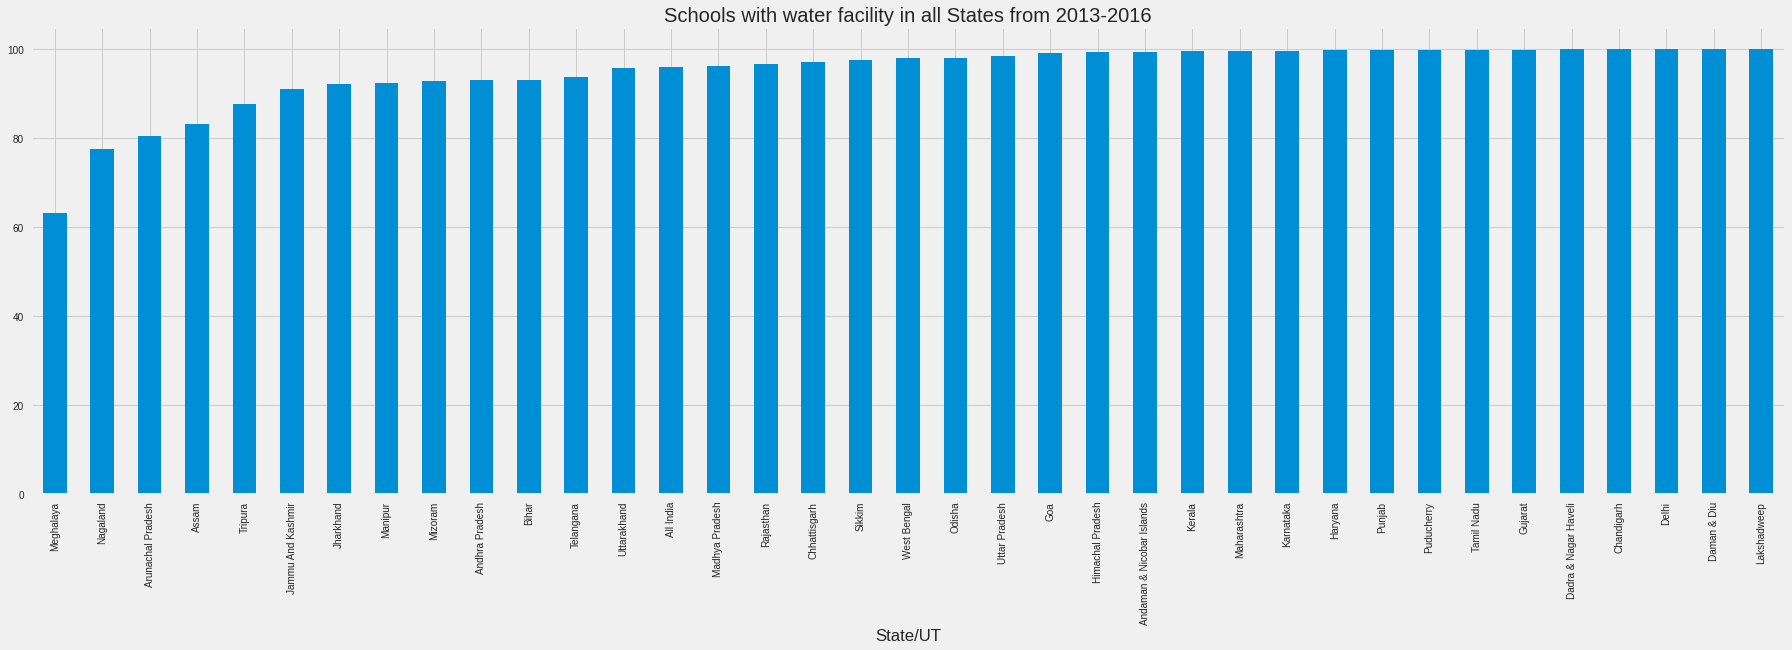

In [199]:
water.groupby(['State/UT'])['All Schools'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Schools with water facility in all States from 2013-2016')

This bar-plot shows the distribution of schools with water facility across India.We can see that 'Meghayala' has the least number of schools with water facility while 'Lakshadweep' has the most number of schools with water facility.
This is ironic as 'Meghalaya' recieves the most rainfall in India,While 'Lakshadeep' is an island.

In [200]:
computers.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,30.40,73.68,89.74,0.00,100.00,97.92,0.00,0.00,100.00,0.00,53.06
1,Andaman & Nicobar Islands,2014-15,30.94,76.54,92.11,100.00,94.74,100.00,0.00,0.00,100.00,0.00,57.25
2,Andaman & Nicobar Islands,2015-16,28.44,78.57,92.50,0.00,94.74,100.00,0.00,0.00,100.00,0.00,57.00
3,Andhra Pradesh,2013-14,12.73,42.72,86.99,45.45,17.07,68.18,73.23,60.00,33.33,19.32,29.57
4,Andhra Pradesh,2014-15,10.29,44.15,88.46,50.00,62.22,68.38,76.59,70.97,66.67,41.60,28.06


# Computers play an important role in education and modernisation in these times.Schools having adequate computer facilities is a must for the students to develop necessary skills.Lets visualise how has computer facility in schools affected the Indian schools

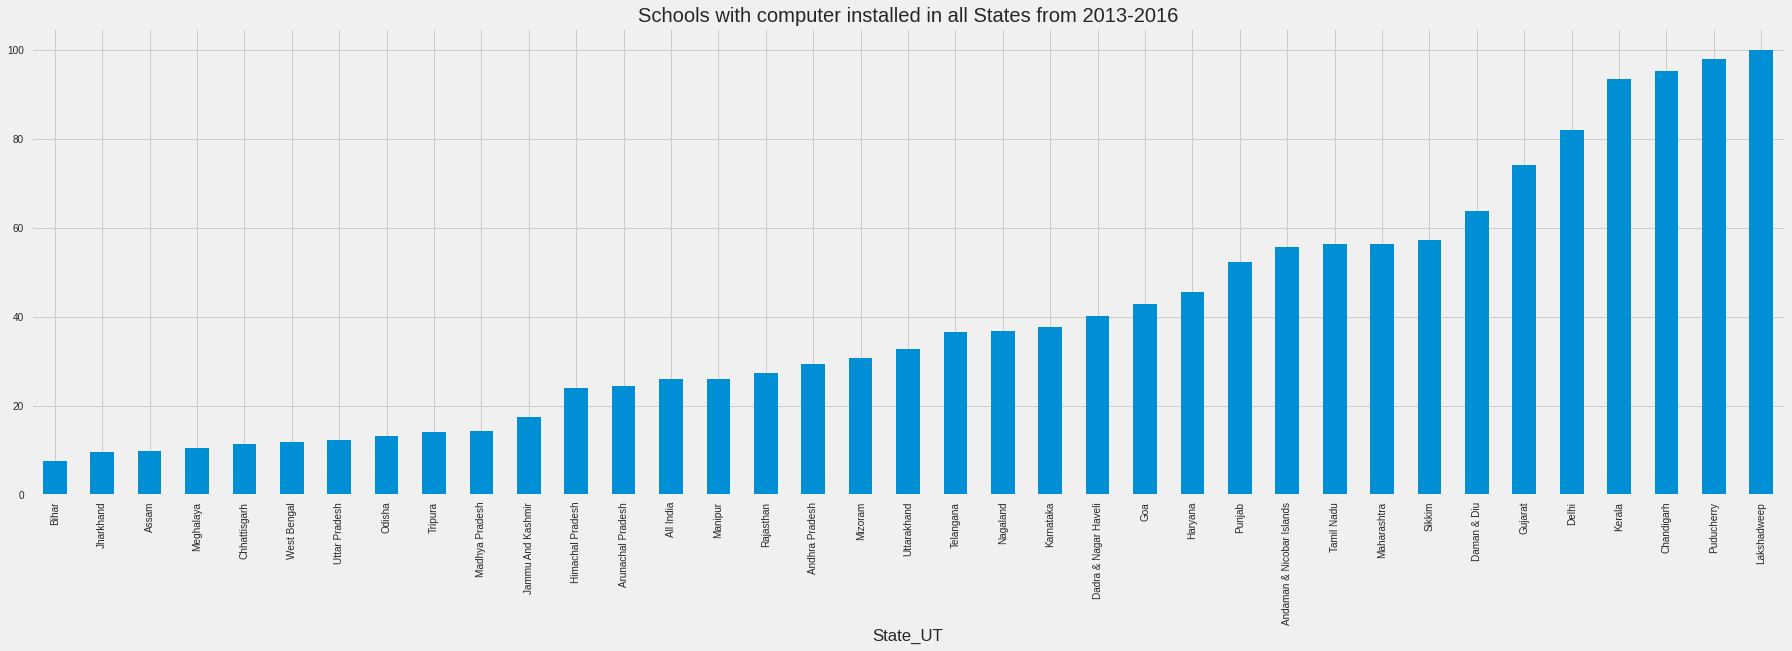

In [201]:
computers.groupby(['State_UT'])['All Schools'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Schools with computer installed in all States from 2013-2016')

This bar-plot shows the distribution of schools with computer facility across India.We can see that 'Bihar' has the least number of schools with computer facility while 'Kerala' has the most number of schools with computer facility among the states. 'Lakshadweep','Puducherry'and 'Daman & Diu' have the most number of schools with computer facility among the union territories.

In [202]:
chart = px.pie(data_frame=computers,values = 'All Schools',names='State_UT',height = 600)
chart.update_traces(textposition = 'inside',textinfo = 'percent+label')

chart.update_layout(title_x = 0.5,
                   geo = dict(showframe = False,
                             showcoastlines = False))
chart.show()

This pie-chart also shows the same result as stated above.

In [203]:
x = computers.State_UT

trace_1 = {
    'x':x,
    'y':computers.Primary_Only,
    'name':'Primary_Education',
    'type':'bar'
};
trace_2 = {
    'x':x,
    'y':computers.Sec_Only,
    'name':'Secondary_Education',
    'type':'bar'
};
trace_3 = {
    'x':x,
    'y':computers.HrSec_Only,
    'name':'HigherSecondary',
    'type':'bar',
};
trace_4 = {
    'x':x,
    'y':computers.U_Primary_Only,
    'name':'UnderPrimary',
    'type':'bar',
};
trace_5 = {
    'x':x,
    'y': computers.Primary_with_U_Primary_Sec,
    'name':'PrimarywithSecondary',
    'type':'bar',
};
trace_6 = {
    'x':x,
    'y':computers.Primary_with_U_Primary_Sec_HrSec,
    'name':'Primary with SeniorSecondary',
    'type':'bar'
};
trace_7 = {
    'x':x,
    'y':computers.U_Primary_Only,
    'name':'UnderPrimary',
    'type':'bar',
};
trace_8 = {
    'x':x,
    'y':computers.U_Primary_With_Sec,
    'name':'UnderPrimaryWithSecondary',
    'type':'bar'
};
trace_9 = {
    'x':x,
    'y':computers.U_Primary_With_Sec_HrSec,
    'name':'UnderPrimarywithSeniorSecondary',
    'type':'bar'
};
data = [trace_1,trace_2,trace_3,trace_4,trace_5,trace_6,trace_7,trace_8,trace_9]
layout = {
    'xaxis':{'title':'Computer facility in Schools'},
    'barmode':'relative',
    'title':'Trend Of computer facility in schools across Indian States',
}
fig = go.Figure(data = data,layout=layout)
iplot(fig)

If we compare with respect to all sections of schools i.e underprimary,underprimary with secondary etc etc...we find that Kerala has the most number of Computrised schools as compared to any other states,Gujarat and Punjab have also developed a lot since past 3 years.we can see that these states have a good improvement in their education sector,by providing computer facilities.

Union territories like Puducherry,Chandighar and Daman and Diu have also contrbuted in a good number.
States like Bihar and JharKhand must develop in this Sector as there contributions towards "Computrised" schools is about ~50%.

We can see that Kerala still remains the State which provides the most number of literates and contributes immensly towards the computrised schools.

In [204]:
df1 = enroll.sort_values(by = ['State_UT'])['Primary_Total']
df2 = electricity.sort_values(by = ['State_UT'])['Primary_Only']
df3 = water.sort_values(by = ['State/UT'])['Primary_Only']
df4 = computers.sort_values(by = ['State_UT'])['Primary_Only']

Making sub datasets for further analysis.We are taking only the column of Primary education percentages.

In [205]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

Defined the function for finding the mean and covariance 

In [206]:
def correlation(x, y):
    std_x = np.std(x)
    std_y = np.std(y)
    if std_x > 0 and std_y > 0:
        return covariance(x, y) / (std_x * std_y)
    else:
        return 0

Defined the function for finding the Correlation.

# Correlation analysis is a statistical method used to measure the strength of the linear relationship between two variables and compute their association.correlation analysis calculates the level of change in one variable due to the change in the other. A high correlation points to a strong relationship between the two variables, while a low correlation means that the variables are weakly related.


*   A positive correlation between two variables means both the variables move in the same direction. An increase in one variable leads to an increase in the other variable and vice versa.
*    A negative correlation between two variables means that the variables move in opposite directions. An increase in one variable leads to a decrease in the other variable and vice versa.



In [207]:
enrollvselectricity=pd.concat([df1, df2],axis = 1)

In [208]:
enrollvswater=pd.concat([df1, df3],axis = 1)

In [209]:
enrollvscomputer=pd.concat([df1, df4],axis = 1)

Merged the sub-dataframes for ease of visulisation

In [210]:
enrollvselectricity.head()

,Primary_Total,Primary_Only
0,93.93,82.42
1,96.74,80.72
2,128.46,82.11
3,113.43,87.66
4,97.96,91.08


In [211]:
enrollvswater.head()

,Primary_Total,Primary_Only
0,93.93,98.17
1,96.74,99.55
2,128.46,100.00
3,113.43,86.89
4,97.96,91.85


In [212]:
enrollvscomputer.head()

,Primary_Total,Primary_Only
0,93.93,30.40
1,96.74,30.94
2,128.46,28.44
3,113.43,12.73
4,97.96,10.29


Now we will plot the re-plot between the two columns.Relplot is a figure-level function for visualizing statistical relationships.

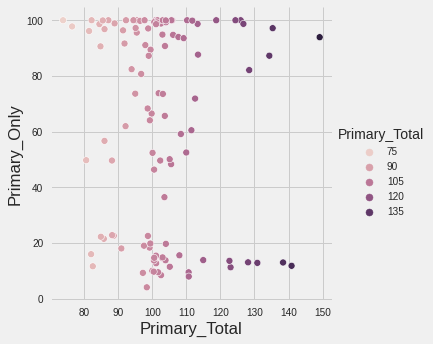

In [213]:
sns.relplot(data=enrollvselectricity, x="Primary_Total", y="Primary_Only",hue="Primary_Total")

From the above relplot we can see that there is a relation between enrollment ration and electrization.There are schools with 100% electrization and 80-100% enrollment ratio.Also there are some schools with around 20% percent electrization but high enrollment ratio.

In [214]:
correlation(df1,df2)

-0.5052932139586528

It has a negative correlation.

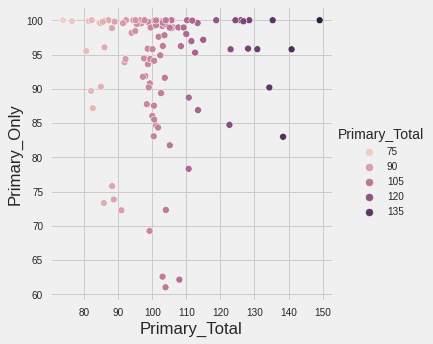

In [215]:
sns.relplot(data=enrollvswater, x="Primary_Total", y="Primary_Only",hue="Primary_Total")

From the above relplot we can see that there is a relation between enrollment ration and water facility available.There are schools with 100% water facility available and 80-120% enrollment ratio.Also there are some schools with around 60-85% water facility available but high enrollment ratio.

In [216]:
correlation(df1,df3)

-0.5860876941025646

it also has negative correlation

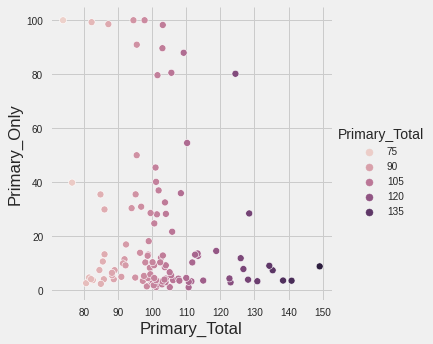

In [217]:
sns.relplot(data=enrollvscomputer, x="Primary_Total", y="Primary_Only",hue="Primary_Total")

From the above relplot we can see that there is a relation between enrollment ration and computer facility available.There are very few schools with 100% computer facility available and 80-120% enrollment ratio.Overall there are schools with around 0-40% computer facility available but average to high enrollment ratio.


In [218]:
correlation(df1,df4)

-0.36950694070235857

it also has negative correlation

In [219]:
electricityvscomputer=pd.concat([df2, df4],axis = 1)

In [220]:
electricityvscomputer.columns=['Primary_Elec','Primary_Comps']

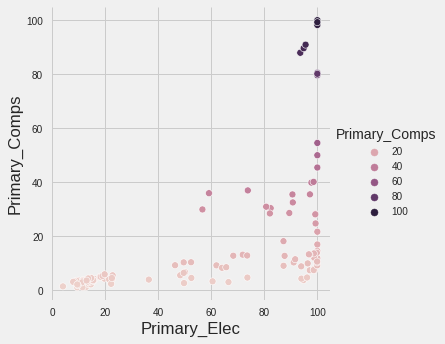

In [221]:
sns.relplot(data=electricityvscomputer, x="Primary_Elec", y="Primary_Comps",hue="Primary_Comps")

From the above relplot we can see that there is a relation between enrollment ration and computer facility available.There are very few schools with 100% computer facility available even if they are 80-100% electrisized.Overall there are schools with around 0-20% computer facility available but average to high electrization.

In [222]:
correlation(df2,df4)

0.5552681720903826

It has a poitive correlation.As we electrify the schools we can increase the computer facilities

In [223]:
boys_toilet.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,53.03,62.58,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88
4,Andhra Pradesh,2014-15,57.91,76.51,96.00,75.00,93.33,91.43,77.99,80.65,60.00,86.54,65.34


In [224]:
girls_toilet.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,All India,2013-14,88.68,95.98,98.81,91.39,98.25,97.33,94.40,99.06,98.36,76.14,91.23
1,All India,2014-15,91.21,96.92,99.48,91.39,99.23,98.19,96.61,90.26,94.05,90.94,93.08
2,All India,2015-16,96.95,99.03,99.72,96.32,99.60,99.31,98.82,95.18,98.31,96.22,97.52
3,Andaman & Nicobar Islands,2013-14,89.74,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,93.44
4,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00


In [225]:
df5 = boys_toilet.sort_values(by = ['State_UT'])['Primary_Only']
df6 = girls_toilet.sort_values(by = ['State_UT'])['Primary_Only']

Making sub datasets for further analysis.We are taking only the column of Primary education percentages.

In [226]:
boysvsgirls=pd.concat([df5, df6],axis = 1)

In [227]:
boysvsgirls.columns=['Primary_Boys','Primary_Girls']

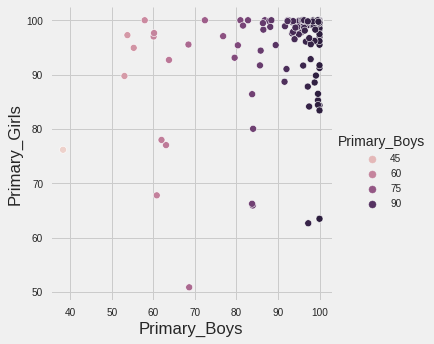

In [228]:
sns.relplot(data=boysvsgirls, x="Primary_Boys", y="Primary_Girls",hue="Primary_Boys")

From the above relplot we can see that there is a good relation between boys toilet facility and girls toilet facility available.Overall almost all the schools have around 85-100% boys and girls toilet facility.

In [229]:
correlation(df5,df6)

0.6006948283750443

It has a high positive correlation which is a good sign

In [230]:
boys_melted = pd.melt(boys_toilet, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')
girls_melted = pd.melt(girls_toilet, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')

We melt the dataset for easy visulization.
(Melting means un-pivoting the dataset and takes data in wide format and stacks a set of columns into a single column of data)

# Sanitation is a very important facility for all schools.Clean envirnment is necessary and fundamental right for every student.

In [231]:
boys_2013 = boys_melted.iloc[np.where(boys_melted.year=='2013-14')]
boys_2014 = boys_melted.iloc[np.where(boys_melted.year=='2014-15')]
boys_2015 = boys_melted.iloc[np.where(boys_melted.year=='2015-16')]

In [232]:
girls_2013 = girls_melted.iloc[np.where(girls_melted.year=='2013-14')]
girls_2014 = girls_melted.iloc[np.where(girls_melted.year=='2014-15')]
girls_2015 = girls_melted.iloc[np.where(girls_melted.year=='2015-16')]

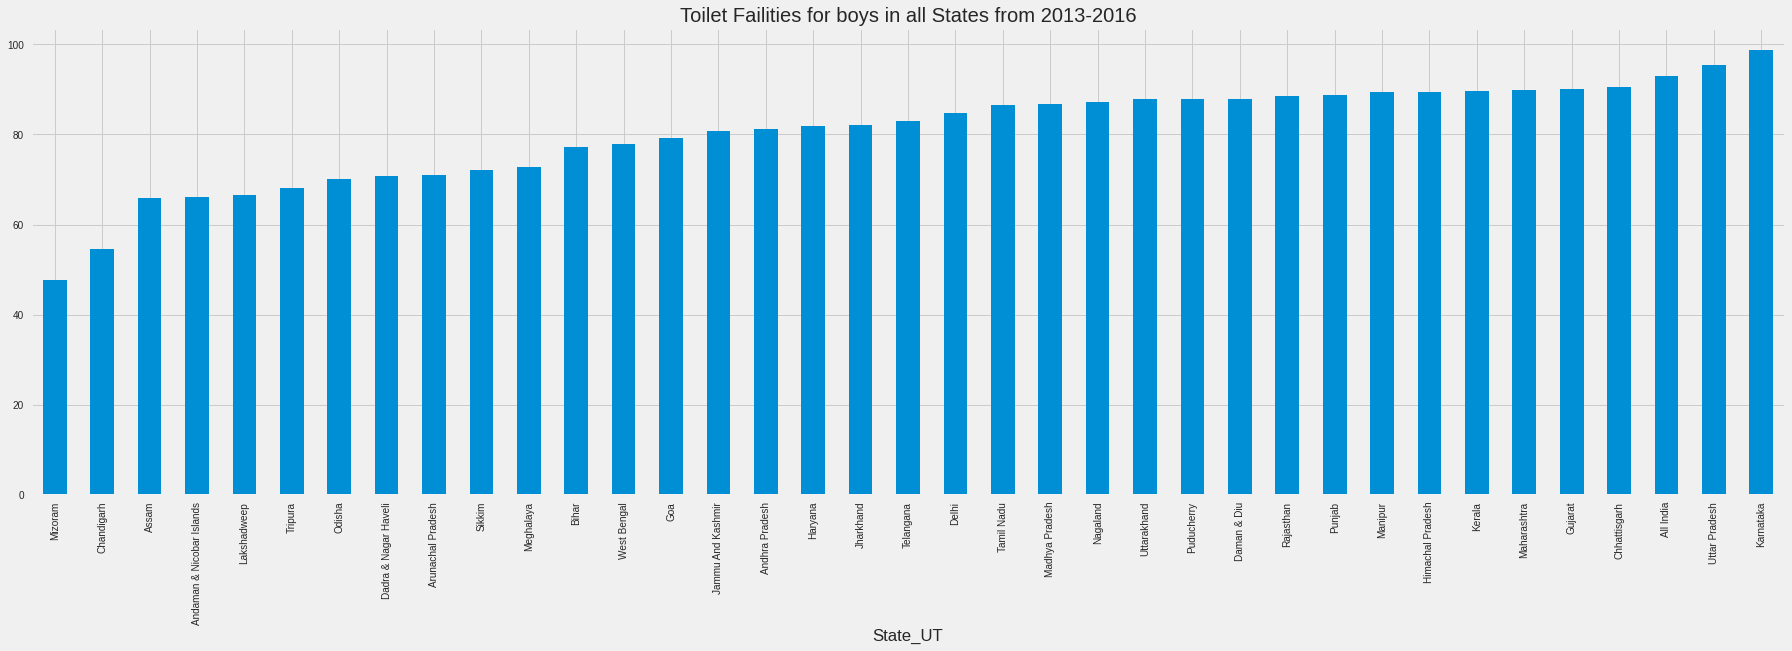

In [233]:
boys_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all States from 2013-2016')


We can see from this bar-plot that 'Mizoram' has the least available boys toilet facility and 'Karnataka' has the most available boys toilet for all the 3 sessions.

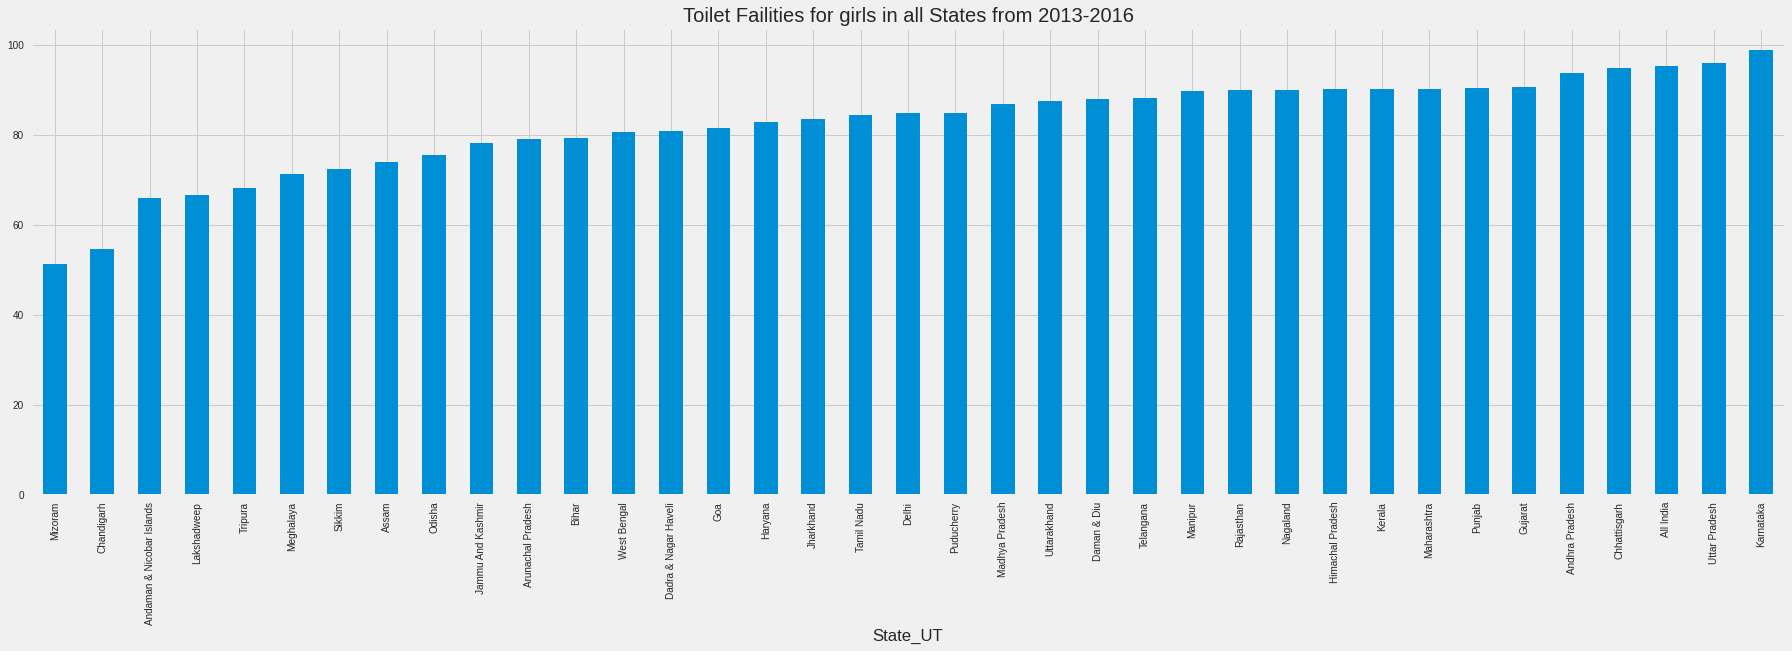

In [234]:
girls_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all States from 2013-2016')

We can see from this bar-plot that 'Mizoram' has the least available girls toilet facility and 'Karnataka' has the most available girls toilet for all the 3 sessions.

# Now we see the trend of Toilet facilities accross India in all 3 sessions

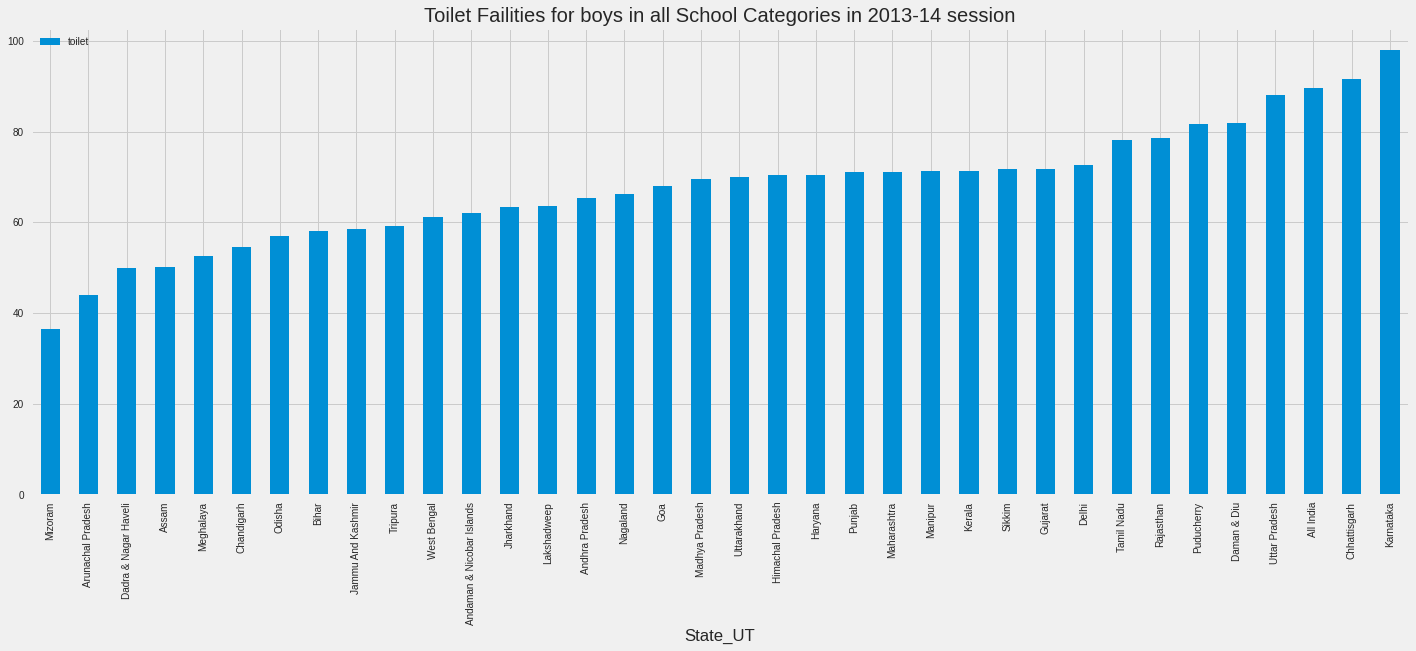

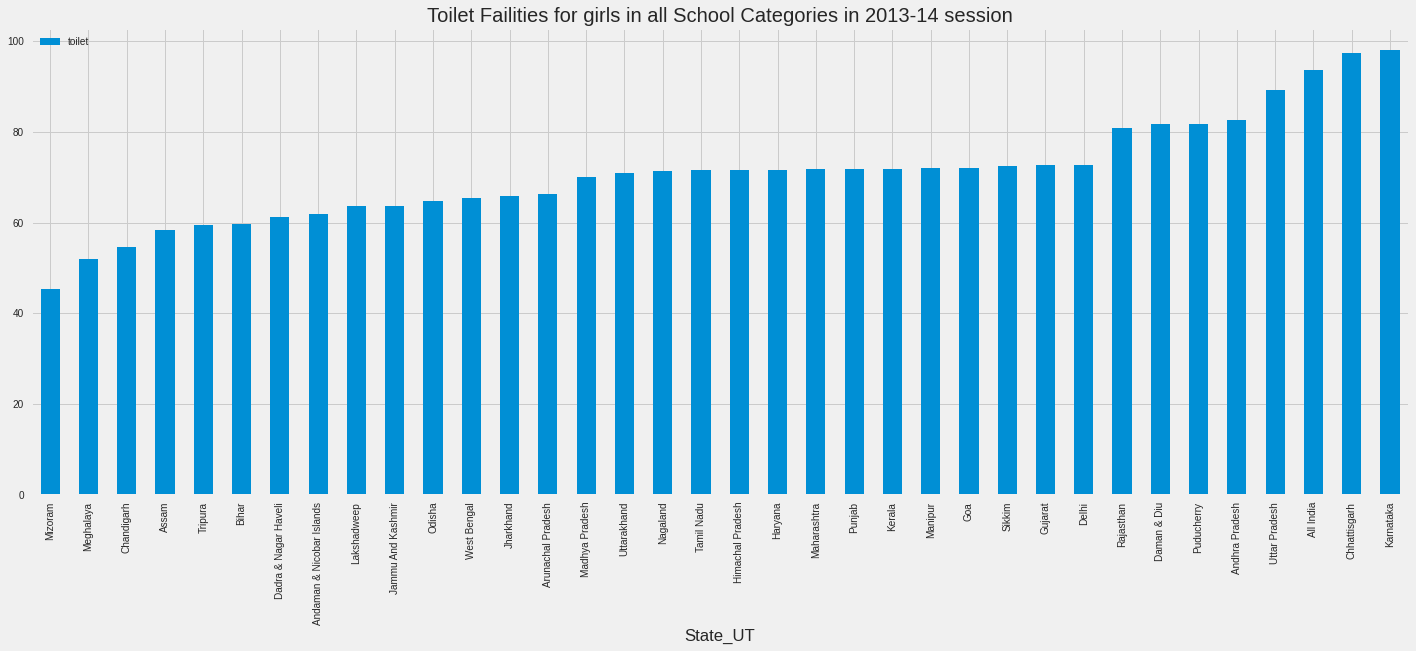

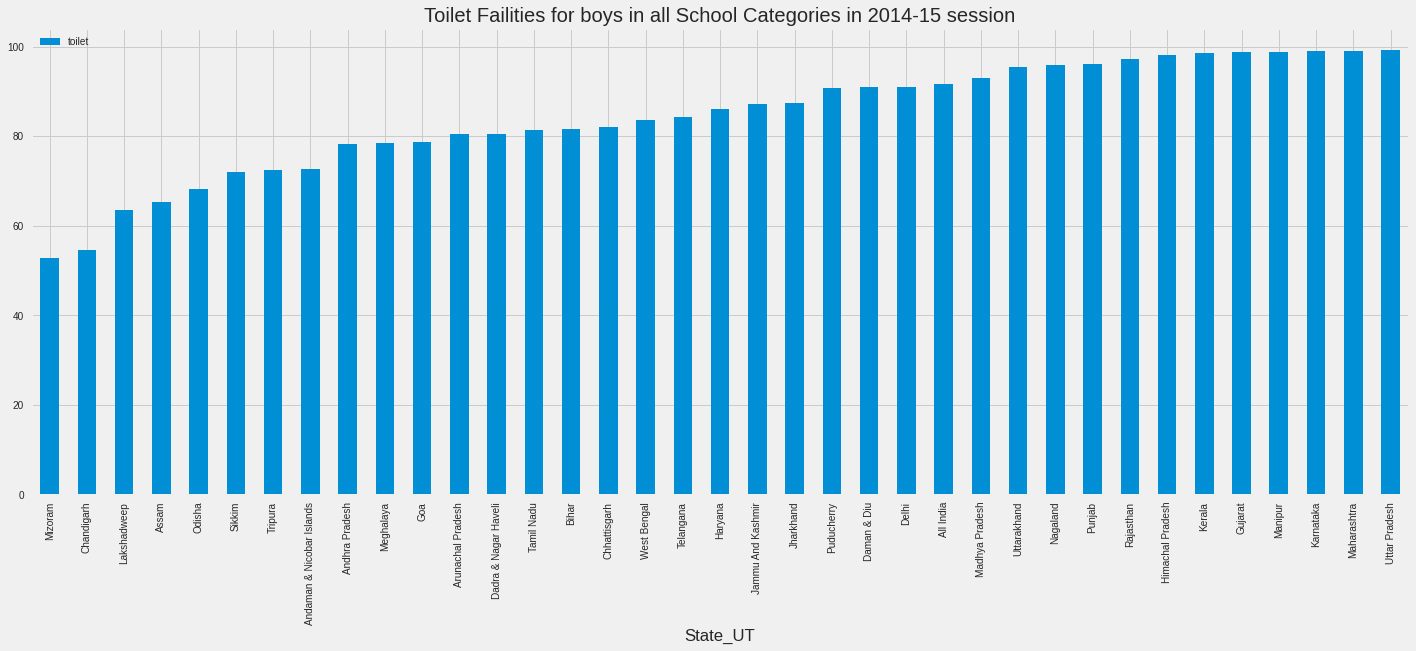

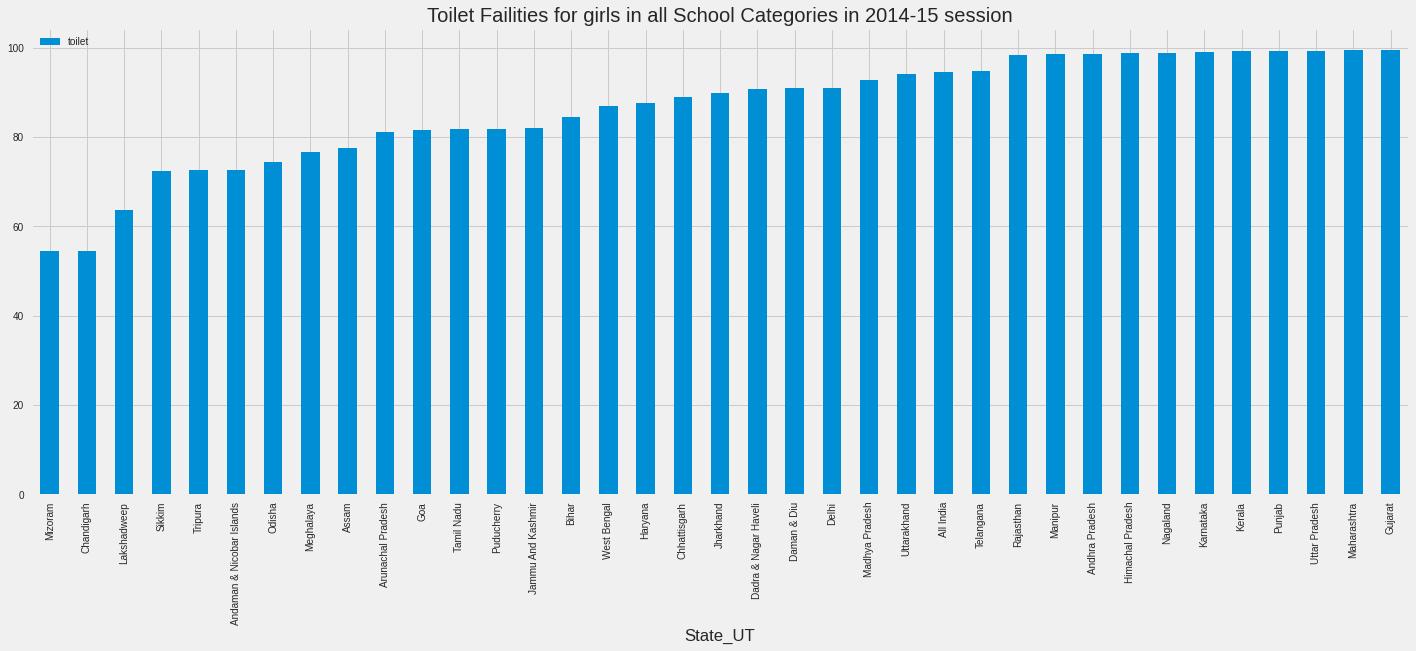

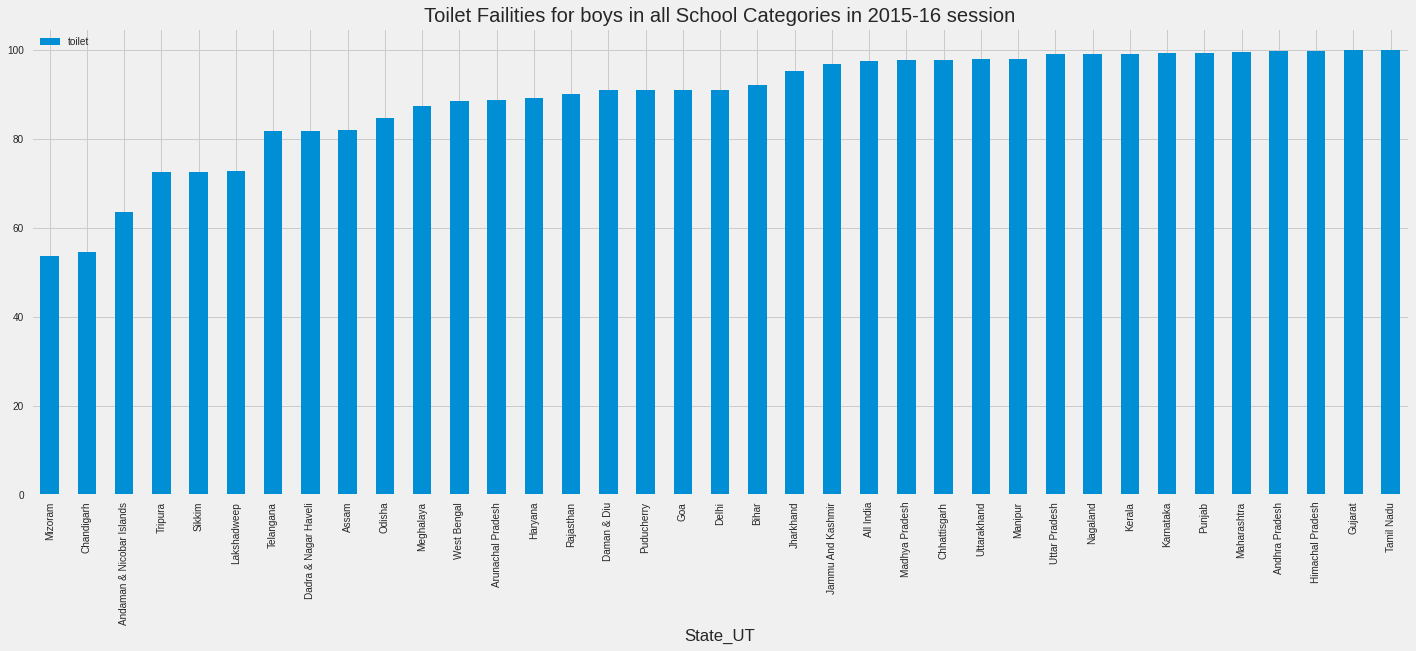

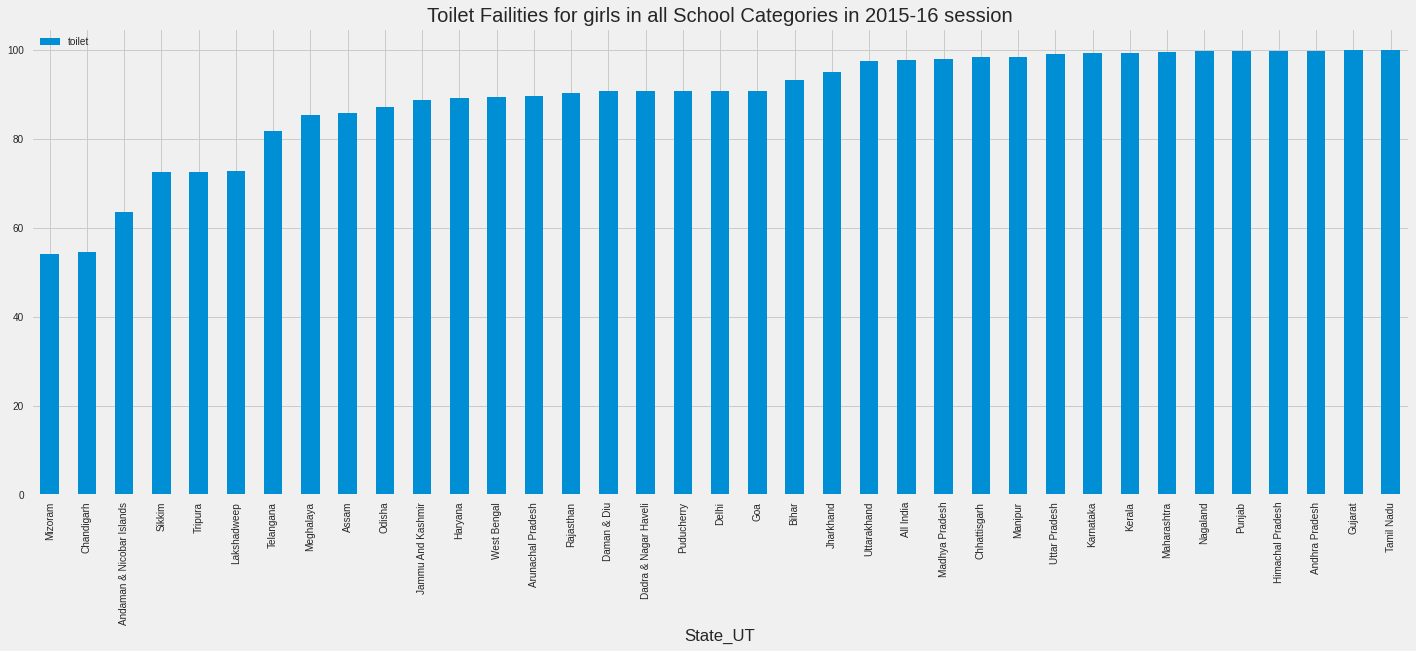

In [235]:
boys_2013.groupby(['State_UT']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2013-14 session')
girls_2013.groupby(['State_UT']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2013-14 session')
boys_2014.groupby(['State_UT']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2014-15 session')
girls_2014.groupby(['State_UT']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2014-15 session')
boys_2015.groupby(['State_UT']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2015-16 session')
girls_2015.groupby(['State_UT']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2015-16 session')


# We can conclude the following things

*   Uttar Pradesh,Maharashtra and Gujarat have done a good job in increaseing Toilet facilities in their schools for the year 2014-15.
*   For the year 2015-16 Tamil nadu has seen a tremendous increase in toilets in their schools.

*   Mizoram still remains the state with least number of toilets for both Boys and Girls for all the 3 sessions

# Overall there has been an increase in number of toilets accross India in the year 2015-16







# We now explore the recent sanitation conditions of our country

In [236]:
water_all = water[water['Year']=='2015-16'][['State/UT','All Schools']]
boys_toilet_all = boys_toilet[boys_toilet['year']=='2015-16'][['State_UT','All Schools']]
girls_toilet_all = girls_toilet[girls_toilet['year']=='2015-16'][['State_UT','All Schools']]

water_all = water_all.rename(columns={'State/UT':'State_UT'})

toilet_sch = pd.merge(boys_toilet_all, girls_toilet_all, on='State_UT')
toilet = pd.merge(toilet_sch, water_all, on='State_UT')

toilet = toilet.rename(columns={'All Schools_x':'boys_toilet','All Schools_y':'girls_toilet',
                          'All Schools':'water_facility'})

We merge the sub dataframes of water facility available ,Boys toilet facility and Girls toilet facility

In [237]:
cm = sns.light_palette("red", as_cmap=True)
toilet.style.background_gradient(cmap=cm)

,State_UT,boys_toilet,girls_toilet,water_facility
0,Andaman & Nicobar Islands,100.000000,100.000000,100.000000
1,Andhra Pradesh,99.690000,99.720000,95.370000
2,Arunachal Pradesh,95.650000,96.560000,81.470000
3,Assam,82.800000,83.940000,86.210000
4,Bihar,89.160000,90.050000,94.430000
5,Chandigarh,100.000000,100.000000,100.000000
6,Chhattisgarh,98.500000,99.160000,99.060000
7,Dadra & Nagar Haveli,100.000000,100.000000,100.000000
8,Daman & Diu,100.000000,100.000000,100.000000
9,Delhi,100.000000,100.000000,100.000000


We can conclude that overall the sanitation facility which includes water facility ,boys and girls toilet is very good with a whooping 99.7-100%.There are some states like Assam,Meghalaya and Bihar which still lack toilets in their schools.